This notebook is a primer for using networkx.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(127)

This is how you make a graph. 

In [2]:
G = nx.Graph()

These are the ways to add nodes, including annotations.

In [3]:
G.add_node(1)
G.add_nodes_from([2, 3, 4, 5])

G.add_node(6, note='foo')  # using **kwargs
G.add_node(7, {'note': 'bar'})  # using attribute dictionary

This is how you add edges, including edges with annotations.

In [4]:
G.add_edge(1, 2)

edge = (2, 3)
G.add_edge(*edge)  # unpacking a tuple

G.add_edge(6, 7, note='baz')
G.add_edge(5, 6, {'note': 'bum'})

G.add_edges_from([(1, 3), (3, 4), (2, 5)])

This is how you draw a graph with matplotlib.

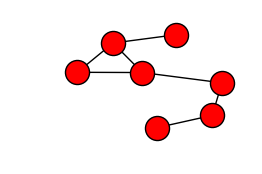

In [5]:
plt.figure(figsize=(2, 1.3))  # changes size of figure
nx.draw(G)

This is how you draw a graph with different layouts on multiple subplots and multiple axes.

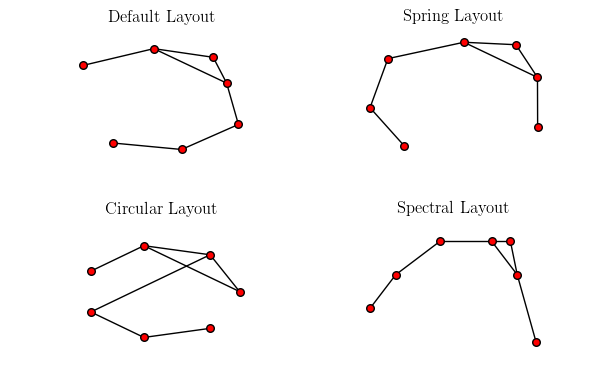

In [6]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].set_title("Default Layout")
nx.draw(G, ax=axes[0, 0], node_size=30)

axes[0, 1].set_title("Spring Layout")
nx.draw_spring(G, ax=axes[0, 1], node_size=30)

axes[1, 0].set_title("Circular Layout")
nx.draw_circular(G, ax=axes[1, 0], node_size=30)

axes[1, 1].set_title("Spectral Layout")
nx.draw_spectral(G, ax=axes[1, 1], node_size=30)

plt.tight_layout()
plt.show()

This is how you access data in a graph

In [7]:
G.nodes()

[1, 2, 3, 4, 5, 6, 7]

In [8]:
G.nodes(data=True)  # returns list of (node, data) pairs

[(1, {}),
 (2, {}),
 (3, {}),
 (4, {}),
 (5, {}),
 (6, {'note': 'foo'}),
 (7, {'note': 'bar'})]

In [9]:
G.node[6]  # G.node is a dictionary from {node: data}

{'note': 'foo'}

In [10]:
G.neighbors(6)

[5, 7]

In [11]:
G[6]  # G is a dictionary from {node: {neighbor: attributes}}

{5: {'note': 'bum'}, 7: {'note': 'baz'}}

In [12]:
G.edge[6][5]

{'note': 'bum'}

In [13]:
G.edges()

[(1, 2), (1, 3), (2, 3), (2, 5), (3, 4), (5, 6), (6, 7)]

This is how you edit data in a graph

In [14]:
G.edge[6][5]['new-node'] = 'bam'

These are alternate ways to build graphs from different data structures

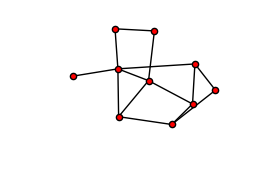

In [15]:
adj = np.random.normal(size=(10, 10)) > 0.80
H = nx.from_numpy_matrix(adj)

plt.figure(figsize=(2, 1.3))
nx.draw(H, node_size=20)